In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

In [2]:
dataset = pd.read_csv('preprocesseddata.csv')

# Data Preprocessing

In [3]:
response=dataset["enrolled"]
dataset=dataset.drop(columns="enrolled")

# Training and Testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,test_size = 0.2,random_state = 0)

In [6]:
train_identifier=X_train['user']
X_train=X_train.drop(columns='user')
test_identifier=X_test['user']
X_test=X_test.drop(columns='user')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc_X=StandardScaler()

In [10]:
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.fit_transform(X_test))

In [11]:
X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values

In [12]:
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

In [13]:
X_train=X_train2
X_test=X_test2

# Model Building

In [14]:
from sklearn.linear_model import LogisticRegression

In [17]:
classifier=LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred=classifier.predict(X_test)

In [21]:
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [23]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7679

In [24]:
precision_score(y_test, y_pred)

0.760856513908345

In [25]:
recall_score(y_test, y_pred)

0.7715097402597403

In [26]:
f1_score(y_test, y_pred)

0.7661460957178842

Test Data Accuracy: 0.7679


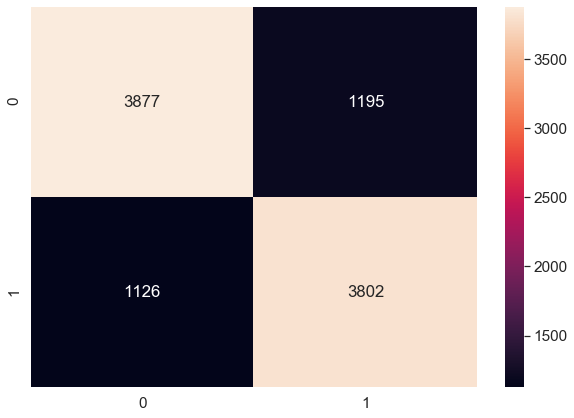

In [27]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

# K fold cross validation 

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.767 (+/- 0.009)


# Formatting

In [30]:
final_results=pd.concat([y_test, test_identifier],axis=1).dropna()

In [31]:
final_results['predicted_results']=y_pred

In [34]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)


,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
